In [5]:
import subprocess
import sys

modules = ['gensim', 'nltk', 'pyLDAvis']
for module in modules:
    subprocess.call([sys.executable, '-m', 'pip', 'install', module])

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import gensim
from sklearn.manifold import TSNE

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import random
import requests
import time
import csv
import json

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-a4qbzg31 because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


# [Word2Vec Algorithm](https://en.wikipedia.org/wiki/Word2vec)

### What is it?
It's a Natural Language Processing [NLP] algorithm that transforms words to vectors.

### When do I use it?
When I want to explore semantics of words. For example: find word's oposites, find context word etc.

### Why should I use it?
1] NLP

2] It's a general idea of mapping elements (eg. strings) onto vectors (and vectors are good to work with). I can use it for recommending next product or a song in playlist.

# How does it work?

* Word2Vec is actualy shallow Neural Network [NN] (1 hidden layer).

* **Starting point:** 
    * We have N words. 
    * Each word is represented by N-dimensional vector with 1 on index position and 0s elsewhere (one-hot encoding).


* We let the NN predict word's naighbours.


* We cut out only the guts of the trained NN - scored hidden leayer values for each word.


* **End point:** 
    * Each word is represented by only M-dimension vector (M << N), that carries some context information.   **:-)**

### Why is it important to have vectors instead of words? Because we have the Algebra!



## Word2Vec: one-hot encoding
<img src="one_hot.png" alt="one_hot" style="width: 600px;"/>

## Word2Vec: Word2Vec output 
<img src="w2v_output.png" alt="w2v_output" style="width: 600px;"/>

## Approaches:
* **Skipgram** [SG]
    * Uses neighbour words as an input to NN and central word as an output.

* **Continuous Bag Of Words** [CBOW]
    * Uses central word as an input to NN and neighbour words as an output.

## Word2Vec: Word neighborhood
<img src="word_neighbour.png" alt="word_neighbour" style="width: 600px;"/>

## Word2Vec: Skipgram method
<img src="skipgram.png" alt="skipgram" style="width: 600px;"/>

## Word2Vec: CBOW method
<img src="cbow.png" alt="skipgram" style="width: 600px;"/>

## Dataset - QUORA

In [2]:
# first download the quora dataset from 
here https://www.quora.com/q/quoradata/First-Quora-Dataset-Release-Question-Pairs

#store the file as data/quora.csv

SyntaxError: invalid syntax (3266477543.py, line 2)

In [5]:
# Load the quora dataset
df = pd.read_csv("data/quora.csv", nrows=241457)
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
df.shape

(241457, 6)

In [7]:
# Transfer the dataset into list of lists
def read_questions(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
    
documents = []
for index, row in df.iterrows():
    documents.append(read_questions(row,"question1"))
    if row["is_duplicate"] == 0:
        documents.append(read_questions(row,"question2"))

In [8]:
# document example 
documents[:4][2]

['what', 'is', 'the', 'story', 'of', 'kohinoor', 'koh', 'noor', 'diamond']

## Model build

In [12]:
# Lets train the word2vec model using skipgram
w2v_model = gensim.models.Word2Vec(vector_size=150, window=10, min_count=5, sg=1, workers=10)
w2v_model.build_vocab(documents)
w2v_model.train(documents, total_examples=len(documents), epochs=w2v_model.epochs)

(14888111, 20934045)

## Model exploration

In [13]:
w2v_model

In [15]:
# Model vocabulary
print(f"Our vocabulary hase {len(w2v_model.wv.index_to_key)} words.")
w2v_model.wv.index_to_key[:10]

Our vocabulary hase 21579 words.


['the', 'what', 'is', 'how', 'to', 'in', 'of', 'do', 'are', 'and']

In [16]:
# Disply vector for specific word
word = 'pineapple'
print(f"Word {word} is represented by {len(w2v_model.wv[word])}-dim vector:")
w2v_model.wv[word]

Word pineapple is represented by 150-dim vector:


array([-0.04637441,  0.03175952, -0.19886957, -0.28002417,  0.01313503,
       -0.05666522,  0.01603769,  0.20861015,  0.00410292, -0.07092723,
        0.12708406, -0.35590783, -0.14486594, -0.10671458, -0.1951678 ,
        0.08776452,  0.05491124,  0.11840912,  0.11139335,  0.04497321,
       -0.09499582, -0.04815705,  0.06216402, -0.1539187 , -0.00385661,
        0.25565416, -0.19006474, -0.12514074, -0.0650615 , -0.29832888,
        0.02752376,  0.15670666, -0.28733882, -0.01070203,  0.06657003,
       -0.05079189,  0.21440986, -0.10326472,  0.06093186, -0.16090618,
        0.04964715, -0.00444726, -0.24872582, -0.08889849,  0.27572098,
       -0.05384144,  0.10585929, -0.10411727, -0.03384667,  0.01273921,
       -0.18792984, -0.13273701, -0.12870744,  0.25725287,  0.01260369,
        0.18086487, -0.16282721,  0.06732561,  0.19612725, -0.20399696,
        0.175772  , -0.17696783,  0.07814191,  0.10820286, -0.04109091,
       -0.00442333, -0.05336651, -0.01712041, -0.12375741, -0.19

In [19]:
# TSNE representation of N words
# explained here https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwi1msnc2frsAhVM66QKHSaBBa0QwqsBMAJ6BAgQEAM&url=https%3A%2F%2Fwww.youtube.com%2Fwatch%3Fv%3DNEaUSP4YerM&usg=AOvVaw08DkVjVHHjrp-L0UaYTfuU
N = 1500
wanted_vocab = random.sample(list(w2v_model.wv.index_to_key), N)
X = w2v_model.wv[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

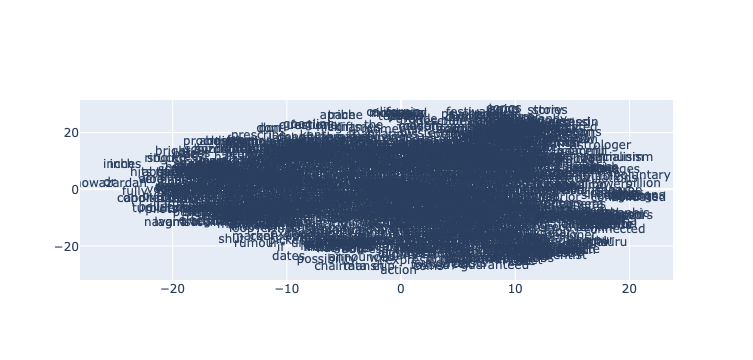

In [20]:
# Plot
trace = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    text = list(wanted_vocab),
    mode='text'
)

data = [trace]

# Plot and embed in ipython notebook!
iplot(data, filename='basic-scatter')

## Using the model

In [22]:
# Find similar word 1
words1 = ['trump']
w2v_model.wv.most_similar(positive=words1, topn=10)

[('donald', 0.961643636226654),
 ('presidency', 0.7947152853012085),
 ('president', 0.7151186466217041),
 ('elect', 0.7082883715629578),
 ('supporters', 0.7054587602615356),
 ('bernie', 0.6894180178642273),
 ('victory', 0.6847273707389832),
 ('hilary', 0.6846835613250732),
 ('sanders', 0.6838914752006531),
 ('democrat', 0.6829518675804138)]

In [27]:
# Find similar word 2
words1 = ['pancake', 'chocolate', 'cream']
w2v_model.wv.most_similar(positive=words1, topn=10)

[('icing', 0.8974555134773254),
 ('frosting', 0.8525694012641907),
 ('chili', 0.8400152325630188),
 ('zucchini', 0.8389703035354614),
 ('pancakes', 0.8379824161529541),
 ('fluffy', 0.831891655921936),
 ('potato', 0.8298907279968262),
 ('seasoning', 0.8295766115188599),
 ('oatmeal', 0.8263869285583496),
 ('turmeric', 0.8262783885002136)]

In [28]:
# Find similar word 4
words1 = ['husband', 'man']
words2 = ['woman']
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('wife', 0.6981763243675232),
 ('sister', 0.6066067814826965),
 ('mom', 0.5989696979522705),
 ('mother', 0.5986445546150208),
 ('dad', 0.5732096433639526),
 ('fiance', 0.5698459148406982),
 ('he', 0.562766432762146),
 ('divorce', 0.5621209740638733),
 ('gf', 0.5568544268608093),
 ('lover', 0.5559055209159851)]

In [46]:
# Find similar word 5
words1 = ['trump', 'republican']
words2 = ['obama']
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('donald', 0.7535174489021301),
 ('presidency', 0.650196373462677),
 ('democrat', 0.6462174654006958),
 ('libertarian', 0.6256507039070129),
 ('rnc', 0.6183809041976929),
 ('election', 0.6133642196655273),
 ('democratic', 0.6028676629066467),
 ('victory', 0.5962984561920166),
 ('rigged', 0.5959542989730835),
 ('gop', 0.5881786346435547)]

In [47]:
# Find similar word 4
words1 = ['programming','beginner']
words2 = []
w2v_model.wv.most_similar(positive=words1, negative=words2, topn=10)

[('newbie', 0.8240118026733398),
 ('haskell', 0.8071752786636353),
 ('programing', 0.8053656220436096),
 ('beginners', 0.7742679119110107),
 ('coding', 0.7603719830513),
 ('compilers', 0.7556273341178894),
 ('codecademy', 0.7525551915168762),
 ('python', 0.750958263874054),
 ('scripting', 0.7480905055999756),
 ('oop', 0.7402097582817078)]

In [48]:
# What should not be there? 1
w2v_model.wv.doesnt_match(['tesla', 'bmw', 'superman', 'mercedes'])

'superman'

In [49]:
# What should not be there? 2
w2v_model.wv.doesnt_match(['trump', 'president', 'wall', 'apple'])

'apple'

In [50]:
# What should not be there? 3
w2v_model.wv.doesnt_match(['weed', 'cocaine', 'heroin', 'amphetamine'])

'weed'

## Sources
[Wiki](https://en.wikipedia.org/wiki/Word2vec)

[Good Article 1](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

[Good Article 1](http://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.XJfruC1_HUo)

[Tensor Flow Article](https://www.tensorflow.org/tutorials/representation/word2vec)

# Data z Poslanecne snemovny CR 2020 ;-)

Z webu www.hlidacstatu.cz lze ziskat API access k steno zaznamum poslanecke snemovne. 

Pro obcany jsou data dostupna tady https://www.psp.cz/eknih/2017ps/stenprot/063schuz/s063002.htm

Dostaneme neco jako:

In [20]:
# load the downloaded tokens (only when you have run the script before and have psp_records_list.csv stored)
with open('psp_records_list.csv', newline='') as f:
    reader = csv.reader(f)
    psp_records_list = list(reader)

In [51]:
# Download single politics statement
# 
my_token = '74292684ab50413f94f89164a8434d1d'

# year_number is year of setup of the psp congress (every 4 years)
# starts 1998
year_number = '1998'
gathering_number = '1'
record_number = 1

record_number_str = str(record_number).zfill(5)
url = 'https://www.hlidacstatu.cz/api/v1/DatasetItem/stenozaznamy-psp/{year_number}_{gathering_number}_{record_number_str}'.format(year_number=year_number, gathering_number=gathering_number, record_number_str=record_number_str)
response = requests.get(url, headers={'Authorization': 'Token {token}'.format(token=my_token)})
response_json = response.json()
response_json

{'Id': '1998_1_00001',
 'poradi': 1,
 'obdobi': 1998,
 'datum': '1998-07-15T00:00:00+02:00',
 'schuze': 1,
 'url': 'http://www.psp.cz/eknih/1998ps/stenprot/001schuz/s001001.htm',
 'cisloHlasovani': None,
 'celeJmeno': 'Miloš Zeman',
 'narozeni': None,
 'HsProcessType': 'person',
 'OsobaId': 'milos-zeman',
 'funkce': 'Předsedající',
 'tema': 'Zahájení schůze',
 'text': 'Vážené kolegyně poslankyně, vážení kolegové poslanci, vážení členové vlády, milí hosté.\nPrezident republiky svolal dnem 7. července 1998 zasedání Poslanecké sněmovny. Na základě toho a v souladu s § 22 zákona o našem jednacím řádu jsem svolal ustavující schůzi Poslanecké sněmovny v jejím třetím volebním období, kterou tímto zahajuji, všechny vás srdečně vítám a přeji vám plný úspěch ve vašem jednání.\nPořad ustavující schůze vychází zejména z ustanovení §§ 23 až 28 našeho jednacího řádu a byl vám rozdán na lavice.\nDovolte mi, abych vás jako obvykle nejdříve seznámil s omluvami na toto zasedání a dále s vydáním náhradní

In [52]:
# assign an empty list for session tokenized records
psp_records = {}

In [53]:
# Loop through multiple politics' records
election_year = '1998'
psp_records[election_year] = []

for gathering_number in range(1, 10):
    print(f'Downloading session {gathering_number}...')
    
    record_number = 2
    response_json = 1
    
    while response_json and record_number<3000:
        if (record_number == 500) or (record_number == 1000) or (record_number == 1500):
            time.sleep(60)
        record_number+=1
        record_number_str = str(record_number).zfill(5)
        url = 'https://www.hlidacstatu.cz/api/v1/DatasetItem/stenozaznamy-psp/{year_number}_{gathering_number}_{record_number_str}'.format(year_number=year_number, gathering_number=gathering_number, record_number_str=record_number_str)
        response = requests.get(url, headers={'Authorization': 'Token {token}'.format(token=my_token)})
        response_json = response.json()
        psp_records[election_year].append(response_json)

In [58]:
print(f"The dataset for years {election_year} - {int(election_year) + 4} has {len(psp_records[election_year])} politics' statements.")

The dataset for years 1998 - 2002 has 5607 politics' statements.


In [59]:
with open(f"data/psp_records_{election_year}.json", 'w') as fp:
    json.dump(psp_records, fp)

In [213]:
### Other political era

# Loop through multiple politics' records
election_year = '2017'
psp_records[election_year] = []

for gathering_number in range(1, 5):
    print(f'Downloading session {gathering_number}...')
    
    record_number = 2
    response_json = 1
    
    while response_json and record_number<3000:
        if (record_number == 500) or (record_number == 1000) or (record_number == 1500):
            time.sleep(60)
        record_number+=1
        record_number_str = str(record_number).zfill(5)
        url = 'https://www.hlidacstatu.cz/api/v1/DatasetItem/stenozaznamy-psp/{year_number}_{gathering_number}_{record_number_str}'.format(year_number=year_number, gathering_number=gathering_number, record_number_str=record_number_str)
        response = requests.get(url, headers={'Authorization': 'Token {token}'.format(token=my_token)})
        response_json = response.json()
        psp_records[election_year].append(response_json)
        
for gathering_number in range(30, 35):
    print(f'Downloading session {gathering_number}...')
    
    record_number = 2
    response_json = 1
    
    while response_json and record_number<3000:
        if (record_number == 500) or (record_number == 1000) or (record_number == 1500):
            time.sleep(60)
        record_number+=1
        record_number_str = str(record_number).zfill(5)
        url = 'https://www.hlidacstatu.cz/api/v1/DatasetItem/stenozaznamy-psp/{year_number}_{gathering_number}_{record_number_str}'.format(year_number=year_number, gathering_number=gathering_number, record_number_str=record_number_str)
        response = requests.get(url, headers={'Authorization': 'Token {token}'.format(token=my_token)})
        response_json = response.json()
        psp_records[election_year].append(response_json)        
        
for gathering_number in range(80, 85):
    print(f'Downloading session {gathering_number}...')
    
    record_number = 2
    response_json = 1
    
    while response_json and record_number<3000:
        if (record_number == 500) or (record_number == 1000) or (record_number == 1500):
            time.sleep(60)
        record_number+=1
        record_number_str = str(record_number).zfill(5)
        url = 'https://www.hlidacstatu.cz/api/v1/DatasetItem/stenozaznamy-psp/{year_number}_{gathering_number}_{record_number_str}'.format(year_number=year_number, gathering_number=gathering_number, record_number_str=record_number_str)
        response = requests.get(url, headers={'Authorization': 'Token {token}'.format(token=my_token)})
        response_json = response.json()
        psp_records[election_year].append(response_json)   
        
for gathering_number in range(100, 105):
    print(f'Downloading session {gathering_number}...')
    
    record_number = 2
    response_json = 1
    
    while response_json and record_number<3000:
        if (record_number == 500) or (record_number == 1000) or (record_number == 1500):
            time.sleep(60)
        record_number+=1
        record_number_str = str(record_number).zfill(5)
        url = 'https://www.hlidacstatu.cz/api/v1/DatasetItem/stenozaznamy-psp/{year_number}_{gathering_number}_{record_number_str}'.format(year_number=year_number, gathering_number=gathering_number, record_number_str=record_number_str)
        response = requests.get(url, headers={'Authorization': 'Token {token}'.format(token=my_token)})
        response_json = response.json()
        psp_records[election_year].append(response_json)                

/home/jupyter/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/jupyter/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/jupyter/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/jupyter/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [214]:
print(f"The dataset for years {election_year} - {int(election_year) + 4} has {len(psp_records[election_year])} politics' statements.")

The dataset for years 2017 - 2021 has 4846 politics' statements.


In [215]:
with open(f"data/psp_records_{election_year}.json", 'w') as fp:
    json.dump(psp_records, fp)

# Word2Vec

In [60]:
election_year = '2017'
#election_year = '1998'

In [61]:
sample_text = psp_records[election_year][0]['text']
sample_text[:100]

'Velice děkuji panu poslanci Zvěřinovi a nyní mi dovolte, kolegyně a kolegové, kontrolní dotaz, zda s'

In [62]:
list(gensim.utils.tokenize(sample_text))[:15]

['Velice',
 'děkuji',
 'panu',
 'poslanci',
 'Zvěřinovi',
 'a',
 'nyní',
 'mi',
 'dovolte',
 'kolegyně',
 'a',
 'kolegové',
 'kontrolní',
 'dotaz',
 'zda']

In [63]:
psp_records_list_text = [x['text'] for x in psp_records[election_year] if x]

psp_records_list_tokens = [list(gensim.utils.tokenize(x)) for x in psp_records_list_text] 

In [64]:
# Lets train the word2vec model using skipgram
w2v_model_psp = gensim.models.Word2Vec(vector_size=200, window=5, min_count=15, sg=1, workers=10)
w2v_model_psp.build_vocab(psp_records_list_tokens) 
w2v_model_psp.train(psp_records_list_tokens, total_examples=w2v_model_psp.corpus_count, epochs=w2v_model_psp.epochs)

(2844627, 3933065)

In [65]:
w2v_model_psp.wv.index_to_key[:15]

['a',
 'se',
 'v',
 'že',
 'je',
 'na',
 'o',
 'to',
 'k',
 'pro',
 'z',
 'návrh',
 's',
 'do',
 'aby']

In [66]:
# Model vocabulary
print(f"Our vocabulary hase {len(w2v_model_psp.wv.index_to_key)} words.")

Our vocabulary hase 5524 words.


In [67]:
# Create TSNE representation of N words - for visualization check of algorithms output
N = 1000
wanted_vocab = random.sample(list(w2v_model_psp.wv.index_to_key), N)
X = w2v_model_psp.wv[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
Y = tsne_model.fit_transform(X)

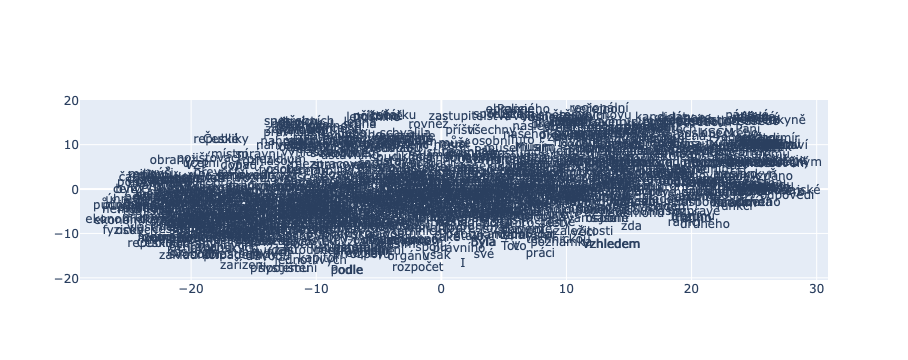

In [68]:
# Plot the TSNE
trace = go.Scatter(
    x = Y[:,0],
    y = Y[:,1],
    text = list(wanted_vocab),
    mode='text'
)

data = [trace]

# Plot and embed in ipython notebook!
iplot(data, filename='basic-scatter')

In [69]:
# Find similar word 1
words1 = ['děkuji']
w2v_model_psp.wv.most_similar(positive=words1, topn=10)

[('pochopení', 0.797834038734436),
 ('Omlouvám', 0.7614524960517883),
 ('senátore', 0.7448666095733643),
 ('potlesk', 0.7407572269439697),
 ('omlouvám', 0.7318387031555176),
 ('místopředsedovi', 0.728636622428894),
 ('zjednat', 0.7251282930374146),
 ('sděluji', 0.715518593788147),
 ('zpravodajce', 0.7127744555473328),
 ('poděkovat', 0.7077201008796692)]

In [70]:
# Find similar word 1
words1 = ['ANO']
w2v_model_psp.wv.most_similar(positive=words1, topn=10)

KeyError: "Key 'ANO' not present"

In [71]:
# Find similar word 1
words1 = ['ODS']
w2v_model_psp.wv.most_similar(positive=words1, topn=10)

[('ČSSD', 0.8181590437889099),
 ('KDU', 0.804908037185669),
 ('ČSL', 0.7885780334472656),
 ('KSČM', 0.7695480585098267),
 ('US', 0.7523460984230042),
 ('Unie', 0.7512921690940857),
 ('poslaneckého', 0.7367806434631348),
 ('klubu', 0.7364068627357483),
 ('klub', 0.7167865633964539),
 ('opoziční', 0.7129825949668884)]

In [72]:
# Find similar word 1
words1 = ['Covid']
w2v_model_psp.wv.most_similar(positive=words1, topn=10)

KeyError: "Key 'Covid' not present"

# LDA

Some code here...

https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html

https://youtu.be/T05t-SqKArY

### Best explanation on this youtube video ^^

## Latent Dirichlet Alocation
<img src="lda1.png" style="width: 600px;"/>

## Overview

<img src="lda2.png"  style="width: 600px;"/>

<img src="lda3.png"  style="width: 600px;"/>

In [100]:
# Tokenize the documents.
from nltk.tokenize import RegexpTokenizer
import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Phrases

[nltk_data] Downloading package wordnet to /home/jupyter/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [193]:
docs = psp_records_list_text.copy()

In [194]:
# Split the documents into tokens.
tokenizer = RegexpTokenizer(r'\w+')
for idx in range(len(docs)):
    docs[idx] = docs[idx].lower()  # Convert to lowercase.
    docs[idx] = tokenizer.tokenize(docs[idx])  # Split into words.

# Remove numbers, but not words that contain numbers.
docs = [[token for token in doc if not token.isnumeric()] for doc in docs]

# Remove words that are only one character.
docs = [[token for token in doc if len(token) > 1] for doc in docs]

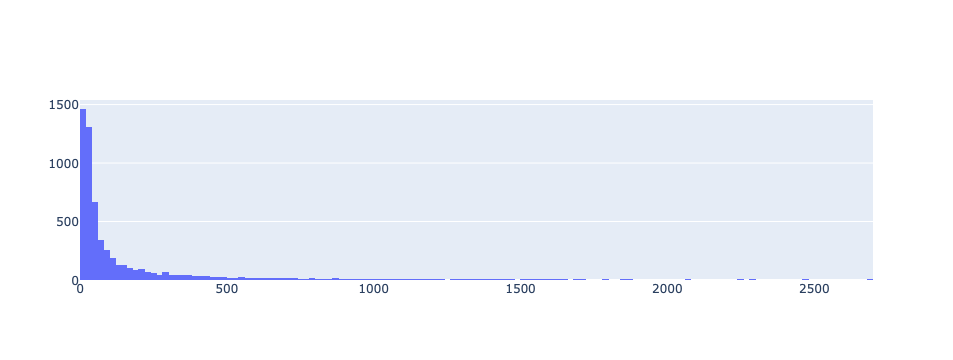

In [195]:
# check what are document lengts - there might be outliers that we do not want to model the
# topics on
doc_lengths = [len(doc) for doc in docs]

# plot histogram of lengths
fig = go.Figure(data=[go.Histogram(x=doc_lengths)])
fig.show()

In [196]:
# Remove documents that are less than 40 words long
docs = [doc for doc in docs if len(doc) > 40]

In [197]:
with open('data/stop_words_czech.json') as json_file:
    stop_words = json.load(json_file)

In [198]:
stop_words[:5]

['ačkoli', 'ahoj', 'ale', 'anebo', 'ano']

In [199]:
# add extra psp related stop-words
extra_stop_words = ["pán",
     "pan",
     "paní",
     "poslanci", 
     "poslanec", 
     "poslankyně", 
     "kolegové",
     "kolegyně", 
     "pánové", 
     "poslanci"
    ]
stop_words = [*stop_words, *extra_stop_words]

stop_words[-2:]

['pánové', 'poslanci']

In [200]:
# Lemmatize the documents. Remove stop words.
lemmatizer = WordNetLemmatizer()
docs = [[lemmatizer.lemmatize(token) for token in doc if token not in stop_words] for doc in docs]

In [203]:
# Compute bigrams.


# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(docs, min_count=20)
for idx in range(len(docs)):
    for token in bigram[docs[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            docs[idx].append(token)

In [205]:
# Remove rare and common tokens.
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 40% of the documents.
dictionary.filter_extremes(no_below=10, no_above=0.4) #, keep_n=80000)

In [207]:
# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]

In [209]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 6467
Number of documents: 2784


In [210]:
# Train LDA model.
from gensim.models import LdaModel

# Set training parameters.
num_topics = 15
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token

lda_model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

In [211]:
top_topics = lda_model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

from pprint import pprint
pprint(top_topics)

Average topic coherence: -1.9035.
[([(0.033032946, 'hlasování'),
   (0.021162795, 'číslo'),
   (0.017568437, 'pořadové'),
   (0.0154679725, 'chvíli'),
   (0.013478572, 'přijat'),
   (0.011363868, 'hlasovat'),
   (0.010621821, 'vyslovilo'),
   (0.010124746, 'návrh_přijat'),
   (0.009952672, 'pana'),
   (0.009945693, 'hlasování_pořadové'),
   (0.009493255, 'zahajuji'),
   (0.009081381, 'přítomných'),
   (0.008908295, 'bodu'),
   (0.008845645, 'ptám'),
   (0.008637927, 'poslance'),
   (0.00860249, 'poslanců'),
   (0.008257127, 'ruku'),
   (0.0080812285, 'tlačítko'),
   (0.007971574, 'rozhodneme'),
   (0.007876838, 'rozpravu')],
  -0.985464290277835),
 ([(0.009331874, 'kč'),
   (0.0076553593, 'pojištění'),
   (0.0062575038, 'zvýšení'),
   (0.0050738095, 'roce'),
   (0.0049656862, 'korun'),
   (0.0049308403, 'velmi'),
   (0.004171054, 'sociální'),
   (0.0041345074, 'systém'),
   (0.003926546, 'znamená'),
   (0.0039102943, 'době'),
   (0.003832049, 'rozpočtu'),
   (0.0036697208, 'těchto'),
 

In [212]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9      0.105446  0.037703       1        1  13.785820
2      0.169476 -0.038434       2        1  12.587335
13     0.110967 -0.018298       3        1  11.768396
14     0.122669 -0.106795       4        1  10.381407
7     -0.321359  0.032739       5        1  10.212509
8      0.046293  0.115700       6        1   7.345869
4     -0.177625  0.005997       7        1   6.932810
5      0.148752  0.061856       8        1   5.868416
11    -0.148814  0.069414       9        1   4.977836
0      0.075975  0.121206      10        1   3.416405
10     0.122465  0.109406      11        1   3.347810
6     -0.143509  0.152263      12        1   2.908185
1      0.068871 -0.214225      13        1   2.434842
3      0.088265 -0.137529      14        1   2.408781
12    -0.267872 -0.191004      15        1   1.623580, topic_info=                   Term         Freq        Total Category  logprob  loglift
156           hlasování  1814.000000  1814.000000  Default  30.0000  30.0000
334              zákona  2424.000000  2424.000000  Default  29.0000  29.0000
873               české  1226.000000  1226.000000  Default  28.0000  28.0000
319              výboru  1410.000000  1410.000000  Default  27.0000  27.0000
408           republiky   851.000000   851.000000  Default  26.0000  26.0000
..                  ...          ...          ...      ...      ...      ...
271            sněmovna    65.829821   736.685466  Topic15  -4.5444   1.7054
37           přítomných    55.848426   423.510836  Topic15  -4.7088   2.0946
232            pořadové    60.088696   745.480903  Topic15  -4.6356   1.6023
322  zahajuji_hlasování    41.640649   262.155418  Topic15  -5.0024   2.2807
321            zahajuji    42.170679   412.913147  Topic15  -4.9897   1.8390

[1047 rows x 6 columns], token_table=      Topic      Freq                 Term
term                                      
6450      9  0.892296                   a1
685       1  0.372897              abychom
685       2  0.001912              abychom
685       3  0.168282              abychom
685       5  0.086053              abychom
...     ...       ...                  ...
5301     12  0.937064               štrait
6464     10  0.989885       živnostenských
2606      2  0.087575            životního
2606     14  0.904940            životního
2607     14  0.990346  životního_prostředí

[3088 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 3, 14, 15, 8, 9, 5, 6, 12, 1, 11, 7, 2, 4, 13])

# TF-IDF topic modelling

In [146]:
import gensim.downloader as api
from gensim.models import TfidfModel
from gensim.corpora import Dictionary



tfidf_model = TfidfModel(corpus)  # fit model
vector = tfidf_model[corpus[0]]  # apply model to the first corpus document

/home/jupyter/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/jupyter/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/jupyter/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/jupyter/.local/lib/python3.8/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


In [147]:
vector

[(0, 0.02378177578850104),
 (1, 0.021294651632088303),
 (2, 0.05654816182504237),
 (3, 0.04950052472319681),
 (4, 0.09163548620499565),
 (5, 0.12720764775984825),
 (6, 0.1341891112011046),
 (7, 0.04964478423030477),
 (8, 0.051956480534724),
 (9, 0.0392063611403336),
 (10, 0.022349753072831775),
 (11, 0.15817618780070858),
 (12, 0.06493498127511141),
 (13, 0.017526747361586312),
 (14, 0.01860986442839107),
 (15, 0.1763669420291633),
 (16, 0.12047479799766396),
 (17, 0.0371680039623872),
 (18, 0.1609963150446435),
 (19, 0.05330226876852327),
 (20, 0.06242262327674896),
 (21, 0.1762278402963807),
 (22, 0.03558754902122732),
 (23, 0.028411701671164236),
 (24, 0.3782506267867594),
 (25, 0.04310123008924263),
 (26, 0.16663637593893527),
 (27, 0.026443009770131722),
 (28, 0.020488526026403765),
 (29, 0.015348508592988683),
 (30, 0.1660391949978893),
 (31, 0.08927246971489051),
 (32, 0.025265217643832476),
 (33, 0.09595159375268539),
 (34, 0.018630114847895292),
 (35, 0.038042911820180936),
 (